### Predicting Sarcasm in Sentences using TensorFlow Deep Learning
- Based on NLP course from kaggle

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [3]:
# Convert Json format into python readable format
import json

def parse_data(file):
    for l in open(file,'r'):
        yield json.loads(l)

data = list(parse_data('../input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json'))

sentences = []
labels = []
urls = []
for item in data:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

In [4]:
# Split train-test data
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [5]:
# Preprocessing the text (i.e. tokenizing, padding, etc.)
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, 
                                padding=padding_type, 
                                maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, 
                                padding=padding_type, 
                               maxlen=max_length, truncating=trunc_type)

In [6]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

num_epochs = 30
history = model.fit(training_padded, training_labels, epochs = num_epochs,
                   validation_data = (testing_padded, testing_labels), verbose=2)


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'
  

Epoch 1/30
625/625 - 4s - loss: 0.6663 - accuracy: 0.5888 - val_loss: 0.5928 - val_accuracy: 0.7490
Epoch 2/30
625/625 - 3s - loss: 0.4472 - accuracy: 0.8248 - val_loss: 0.3937 - val_accuracy: 0.8313
Epoch 3/30
625/625 - 2s - loss: 0.3213 - accuracy: 0.8702 - val_loss: 0.3591 - val_accuracy: 0.8459
Epoch 4/30
625/625 - 3s - loss: 0.2689 - accuracy: 0.8942 - val_loss: 0.3552 - val_accuracy: 0.8416
Epoch 5/30
625/625 - 3s - loss: 0.2332 - accuracy: 0.9104 - val_loss: 0.3567 - val_accuracy: 0.8423
Epoch 6/30
625/625 - 3s - loss: 0.2055 - accuracy: 0.9218 - val_loss: 0.3462 - val_accuracy: 0.8545
Epoch 7/30
625/625 - 3s - loss: 0.1837 - accuracy: 0.9321 - val_loss: 0.3619 - val_accuracy: 0.8501
Epoch 8/30
625/625 - 3s - loss: 0.1654 - accuracy: 0.9385 - val_loss: 0.3679 - val_accuracy: 0.8554
Epoch 9/30
625/625 - 3s - loss: 0.1497 - accuracy: 0.9459 - val_loss: 0.3973 - val_accuracy: 0.8442
Epoch 10/30
625/625 - 3s - loss: 0.1357 - accuracy: 0.9521 - val_loss: 0.4218 - val_accuracy: 0.8395

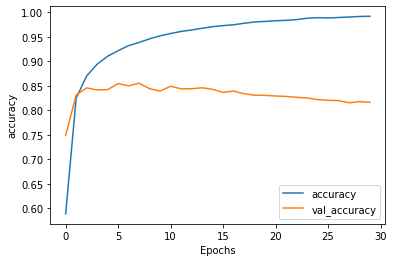

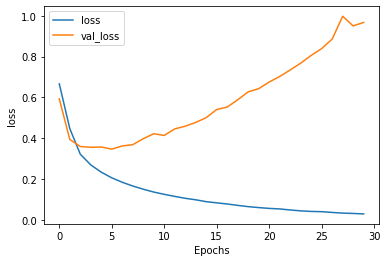

In [8]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [9]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[9.6522331e-01]
 [4.3162767e-05]]


In [10]:
sentence = ["The sky is blue Susan", "Boy you really did an awesome job you only screwed it up a little bit"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[1.9750765e-07]
 [9.9927545e-01]]
